### **Generate patches from the selected validation scenes.**
#### We take the sentinel-2 scenes as example, and select the first 20 scenes as the 


In [1]:
import config
import torch
from glob import glob
import numpy as np
from pyrsimg import crop2size
from dataloader.preprocess import read_normalize
from pyrsimg import imgShow, imsShow, img2patch
import matplotlib.pyplot as plt


In [2]:
## --------- Validation data paths -------- #
paths_scene = sorted(glob(config.dir_s2 + '/scene/*')) 
paths_truth = [path_scene.replace('/scene/', '/truth/').replace('_6Bands', '').split('.')[0] + '_truth.tif' for path_scene in paths_scene]
paths_val_scene, paths_val_truth = [paths_scene[i] for i in config.i_valset], [paths_truth[i] for i in config.i_valset]
print(paths_val_scene[0])
print(paths_val_truth[0])
print('Number of val scenes:', len(paths_val_scene))
print('Number of total scenes:', len(paths_scene))


/home/xin/Developer-luo/WatSet/sentinel-2/scene/S2A_L2A_20190125_N0211_R034_6Bands_S1.tif
/home/xin/Developer-luo/WatSet/sentinel-2/truth/S2A_L2A_20190125_N0211_R034_S1_truth.tif
Number of val scenes: 20
Number of total scenes: 95


In [3]:
### ----- data read & pre-processing ------- ###
val_scene_list, val_truth_list = read_normalize(paths_img=paths_val_scene, \
                            paths_truth=paths_val_truth, max_bands=config.bands_max, min_bands=config.bands_min)
ziped_val_data = list(zip(val_scene_list, val_truth_list))
len(ziped_val_data)


20

### Validation data preparation
#### 1. Generate (patches, truth) test data, the patches is a list, consist of patches in three scales.

In [4]:
ziped_val_data[0][0].shape


(764, 868, 6)

In [5]:
num_patch = 0
for i in range(50):
    print(i)
    for scene_arr, truth_arr in ziped_val_data:
        truth_arr = truth_arr[:,:, np.newaxis]
        img_truth = np.concatenate((scene_arr, truth_arr), axis=2)
        patch_img_truth = crop2size(img=img_truth, channel_first=False).toSize(size=(256,256))
        patch_img_truth = patch_img_truth.transpose(2,0,1)
        patch = torch.from_numpy(patch_img_truth[0:-1,:,:]).to(dtype=torch.float16)
        ptruth = torch.from_numpy(patch_img_truth[-1:,:,:]).long()
        path_save = 'dset_val_patch/s2/patch_'+ str(num_patch).rjust(3,'0')+'.pt'
        num_patch+=1
        # print(path_save)
        # torch.save((patch, ptruth), path_save)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


### Check

In [6]:
## load data
paths_patch_val = sorted(glob(config.dir_patch_val_s2+'/*'))
patch_list_val = [torch.load(path) for path in paths_patch_val]
print(len(patch_list_val))


1000


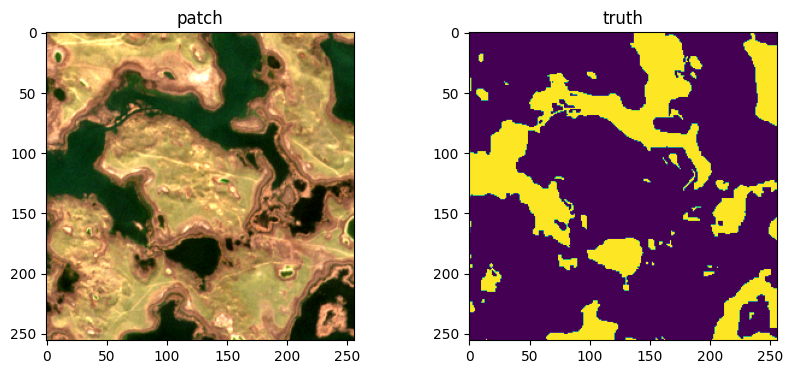

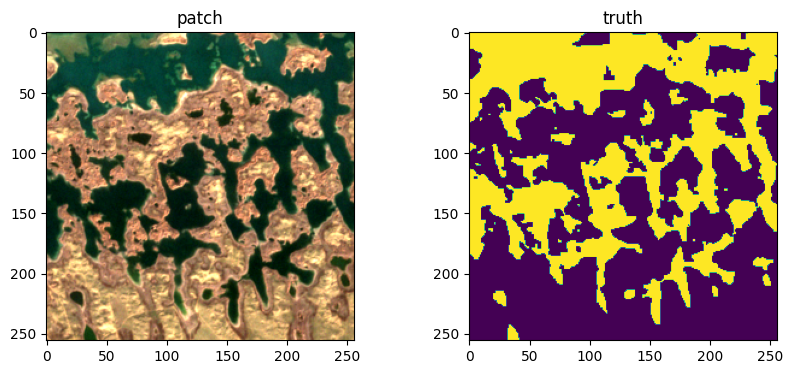

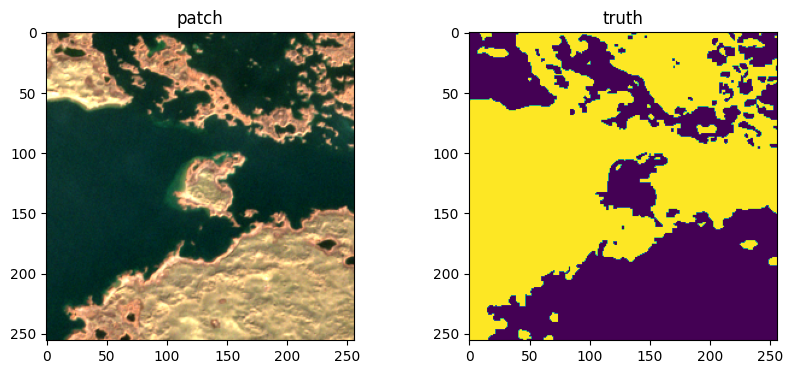

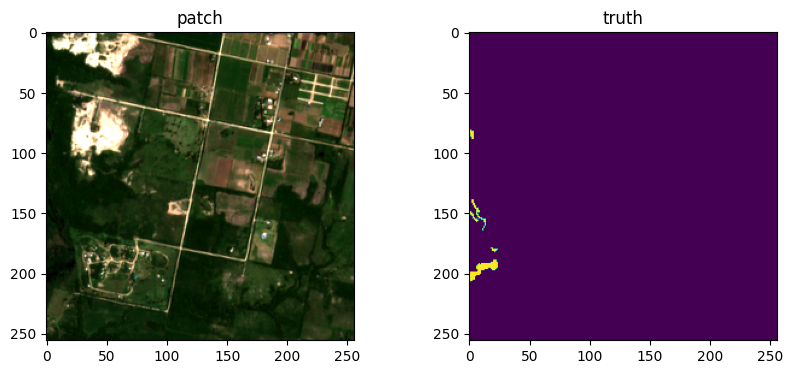

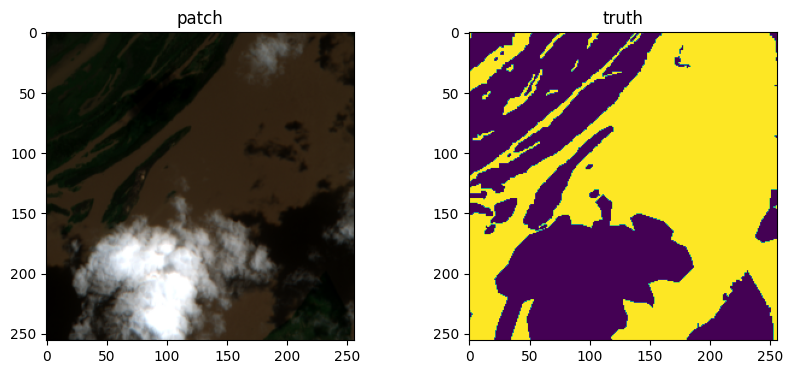

In [7]:
# idx = 16
# idx = random.randint(0,500)
for idx in range(100,105):
  # print(idx)
  patch, truth = patch_list_val[idx]  ## (patches, truth)
  patch = patch.numpy().transpose(1,2,0).astype(np.float32)
  truth = truth.numpy().transpose(1,2,0)
  patch_truth = [patch, truth]
  patch_truth_name = ['patch','truth']
  clip_list = [2, 0]
  col_bands_list = [(2,1,0), (0,0,0)]
  plt.figure(figsize=(10, 4))
  imsShow(img_list=patch_truth, img_name_list=patch_truth_name, \
                                  clip_list=clip_list, color_bands_list=col_bands_list)
